# Test of CSBM

In [2]:
import torch
from torch_geometric.data import Data

In [18]:
import numpy as np
from collections import Counter

## Draw class labels of 10 classes with uniform distribution

In [4]:
categories = list(range(1, 11))
probabilities = [0.1] * 10

In [5]:
n = 50
draw = np.random.choice(categories, n, p=probabilities)

In [16]:
# class labels
draw

array([ 6,  1,  6,  1, 10,  8,  8,  4,  4,  4,  1,  3,  4,  1,  5,  2,  6,
        4,  4,  8,  9,  5,  5,  3, 10,  8,  2,  2,  2,  6,  3,  5,  4,  9,
        2,  3,  3,  5,  8,  1,  4, 10, 10, 10, 10,  5,  8,  7,  8,  9])

In [15]:
print(sorted([(cls, occ) for cls, occ in Counter(draw).items()]))

[(1, 5), (2, 5), (3, 5), (4, 8), (5, 6), (6, 4), (7, 1), (8, 7), (9, 3), (10, 6)]


## Draw random vectors from the same class

In [19]:
mean = np.ones(9)
mean = mean / np.linalg.norm(mean)
mean

array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333])

In [20]:
cov = 0.1 * np.eye(9)
cov

array([[0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1]])

In [30]:
X = np.random.multivariate_normal(mean, cov, 5)
X

array([[ 0.01451491,  0.43498616,  0.21215414,  0.17288156,  0.23401122,
         0.74136563,  0.20088267,  0.22317485,  0.48515688],
       [ 0.45215857,  0.9644416 ,  0.44844246,  0.54293893,  0.96523577,
         0.35314391,  0.2509092 , -0.04762716, -0.04433592],
       [ 0.46081012,  0.67900356,  0.30608439,  0.01603147,  0.22655556,
         0.08662196,  0.23173683,  0.31723285,  0.56367534],
       [ 0.3208101 ,  0.60134394,  0.34064173,  0.44119372, -0.11264512,
         0.20570765,  0.0628191 , -0.07134489,  0.2721792 ],
       [-0.31703421,  0.01953056,  0.06463298,  0.33761114,  0.16198798,
         0.06710537,  0.01638996,  0.31734982,  0.656813  ]])

In [31]:
import matplotlib.pyplot as plt

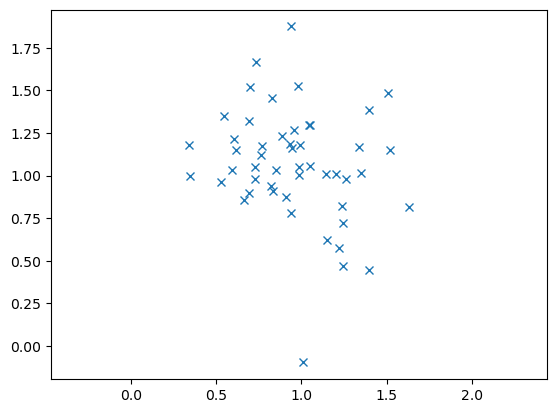

In [49]:
m = [1, 1]
sigma_square = 0.1
cv = np.eye(2) * sigma_square
x, y = np.random.multivariate_normal(m, cv, 50).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [54]:
def initialize_means(c, d):
    means = np.zeros((c, d))
    ones_per_mean = d / c
    curr_mean = 0
    i = 0
    while i < d:
        if i < (curr_mean + 1) * ones_per_mean:
            means[curr_mean][i] = 1.0
            i += 1
        else:
            curr_mean += 1
    return [mean / np.linalg.norm(mean) for mean in means]

In [55]:
M = initialize_means(3, 10)
M

[array([0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ]),
 array([0.        , 0.        , 0.        , 0.        , 0.57735027,
        0.57735027, 0.57735027, 0.        , 0.        , 0.        ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.57735027, 0.57735027, 0.57735027])]

In [59]:
import networkx as nx
import torch_geometric

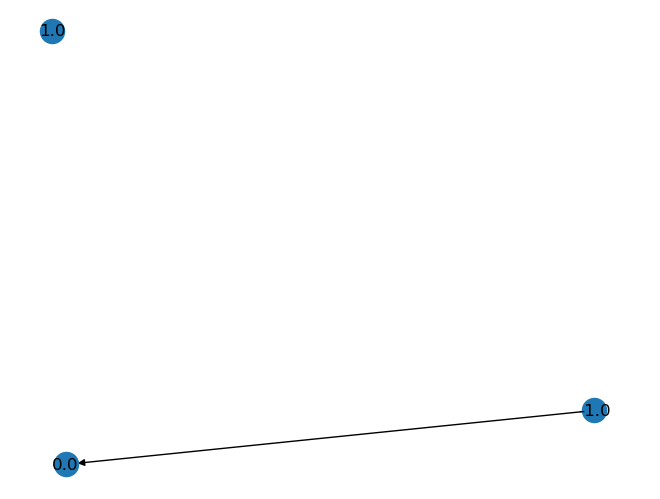

In [104]:
edge_index = torch.tensor([[0],
                          [1]], dtype=torch.long)
#edge_index.add(torch.tensor([[1], [1]], dtype=torch.long))
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
g = torch_geometric.utils.to_networkx(data, to_undirected=False)
labeld = {node: val for node, val in enumerate(list(x.numpy().flatten()))}
nx.draw(g, labels=labeld, with_labels=True)

In [102]:
edge_index

tensor([[0],
        [1]])